# Importar Librerías

In [1]:
import numpy as np
from math import erf
import matplotlib.pyplot as plt
from scripts import style
style.mpl_apply()


np.random.seed(863) 

# Ejercicio 1

$$
\theta=\int_0^1 e^{x} dx=e-1.
$$
Monte Carlo (MC) estima $\theta$ por promedios muestrales de (f(U)). Antitéticas usan el par ((U,1-U)) que induce covarianza negativa cuando (f) es monótona creciente, reduciendo la varianza. 


Cálculo de momentos para $U\sim \mathrm{Unif}(0,1)$:
$$
\mathbb{E}[e^{aU}]=\int_0^1 e^{au} du=\frac{e^{a}-1}{a}.
$$
Entonces
$$
\theta=\mathbb{E}[e^{U}]=e-1 \quad
\mathbb{E}[e^{2U}]=\frac{e^{2}-1}{2}.
$$
Varianza clásica:
$$
\sigma^2:=\mathrm{Var}(e^{U})=\frac{e^{2}-1}{2}-(e-1)^2.
$$
Covarianza antitética:
$$
\mathrm{Cov}(e^{U},e^{1-U})=\mathbb{E}[e^{U}e^{1-U}]-\mathbb{E}[e^{U}] \mathbb{E}[e^{1-U}]
=e-(e-1)^2<0.
$$
Varianza antitética:
$$
\mathrm{Var}(\hat\theta_n^{(A)})=\frac{1}{2n}(\sigma^2+\mathrm{Cov}(e^{U},e^{1-U})).
$$
**Factor de reducción de varianza (FRV):**
$$
\mathrm{FRV}:=\frac{\mathrm{Var}(\hat\theta_n^{(A)})}{\mathrm{Var}(\hat\theta_n)}
=\frac{\sigma^2+\mathrm{Cov}(e^{U},e^{1-U})}{2\sigma^2}
=\frac{1}{2}+\frac{\mathrm{Cov}(e^{U},e^{1-U})}{2\sigma^2} < \frac{1}{2}.
$$
Todo el esquema antitético y las identidades de varianza/covarianza siguen las notas de reducción de varianza. 

**Valores numéricos exactos:**
$$
\theta=e-1\approx 1.7182818285 \quad
\sigma^2\approx 0.24203560745 \quad
\mathrm{Cov}\approx -0.23421061355,
$$
$$
\mathrm{Var}(\hat\theta_n)\approx \frac{0.24203560745}{n} \quad
\mathrm{Var}(\hat\theta_n^{(A)})\approx \frac{0.00391249695}{n},
$$
$$
\mathrm{FRV}\approx 0.0161649643 (\text{reducción} \approx 98.38
$$

In [2]:
n = 100
true_theta = np.e - 1.0  ## valor exacto

## 1) Monte Carlo clásico
U = np.random.rand(n)
fU = np.exp(U)
theta_hat = fU.mean()

## varianza muestral del promedio: s^2 / n
s2 = fU.var(ddof=1)
var_hat = s2 / n
se_hat = np.sqrt(var_hat)

## 2) Monte Carlo con antitéticas
Ua = U                      ###### reutilizamos U para formar pares (U, 1-U)
fU_a = np.exp(Ua)
f1U_a = np.exp(1.0 - Ua)
pair_avg = 0.5 * (fU_a + f1U_a)
theta_hat_a = pair_avg.mean()

s2_pair = pair_avg.var(ddof=1)
var_hat_a = s2_pair / n
se_hat_a = np.sqrt(var_hat_a)

## 3) Valores teóricos para comparar
var_classic_theo = ((np.e**2 - 1)/2.0 - (np.e - 1.0)**2) / n
cov_theo = (np.e - (np.e - 1.0)**2)
var_antithetic_theo = ( ( ((np.e**2 - 1)/2.0 - (np.e - 1.0)**2) + cov_theo ) / 2.0 ) / n
frv_theo = var_antithetic_theo / var_classic_theo


## 4) Impresión de resultados
print(f"Valor verdadero θ = e - 1 = {true_theta:.10f}")
print("\n--- Estimador clásico ---")
print(f"θ̂ = {theta_hat:.10f},  SE≈{se_hat:.6e},  Var≈{var_hat:.6e}")
print(f"Var teórica del promedio ≈ {var_classic_theo:.6e}")

print("\n--- Estimador antitético ---")
print(f"θ̂_A = {theta_hat_a:.10f},  SE≈{se_hat_a:.6e},  Var≈{var_hat_a:.6e}")
print(f"Var teórica del promedio antitético ≈ {var_antithetic_theo:.6e}")
print(f"FRV teórico (Var_A / Var_clásica) ≈ {frv_theo:.6f}")


Valor verdadero θ = e - 1 = 1.7182818285

--- Estimador clásico ---
θ̂ = 1.7926446271,  SE≈4.712016e-02,  Var≈2.220310e-03
Var teórica del promedio ≈ 2.420356e-03

--- Estimador antitético ---
θ̂_A = 1.7119876053,  SE≈6.134846e-03,  Var≈3.763633e-05
Var teórica del promedio antitético ≈ 3.912497e-05
FRV teórico (Var_A / Var_clásica) ≈ 0.016165


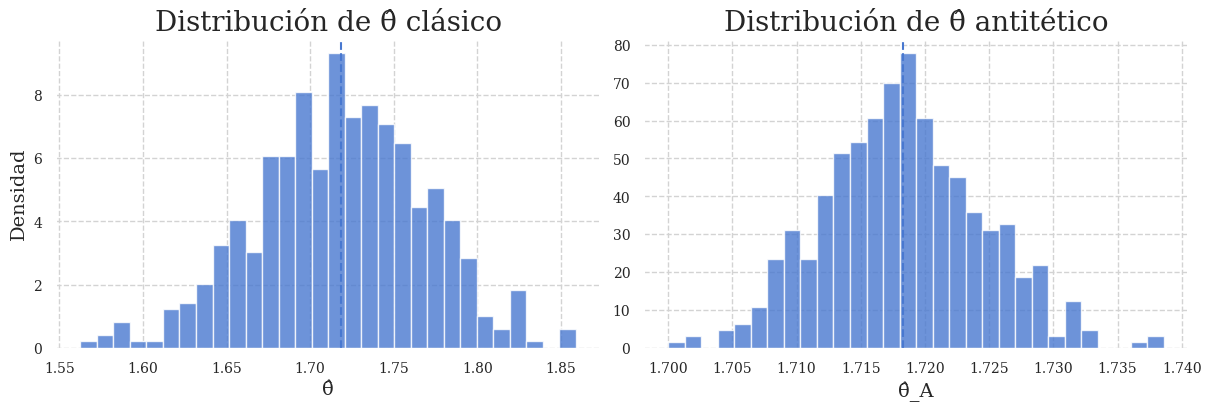

In [3]:
## 5) Distribución de promedios por reboots (para visualizar varianzas)
B = 500  ## reboots del experimento para visualizar dispersión de los estimadores
means_classic = np.empty(B)
means_anti = np.empty(B)

for b in range(B):
    U_b = np.random.rand(n)
    means_classic[b] = np.exp(U_b).mean()
    means_anti[b] = 0.5 * (np.exp(U_b) + np.exp(1 - U_b)).mean()

fig, ax = plt.subplots(1, 2, figsize=(12,4), constrained_layout=True)

ax[0].hist(means_classic, bins=30, alpha=0.8, density=True)
ax[0].axvline(true_theta, linestyle="--")
ax[0].set_title("Distribución de θ̂ clásico")
ax[0].set_xlabel("θ̂")
ax[0].set_ylabel("Densidad")

ax[1].hist(means_anti, bins=30, alpha=0.8, density=True)
ax[1].axvline(true_theta, linestyle="--")
ax[1].set_title("Distribución de θ̂ antitético")
ax[1].set_xlabel("θ̂_A")

plt.show()

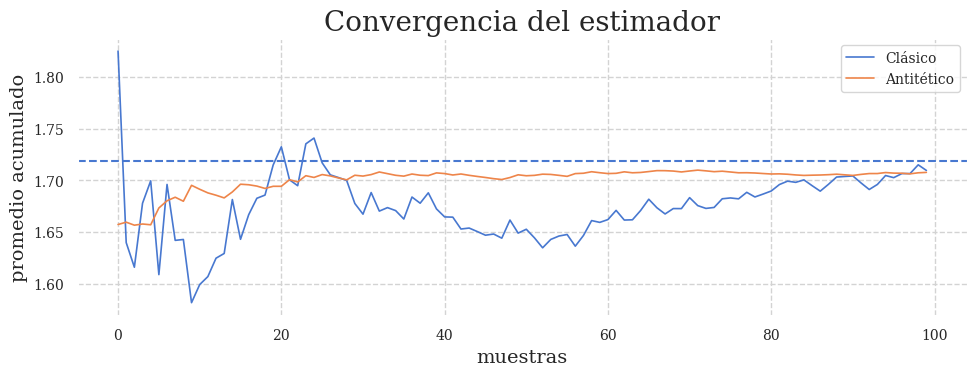

In [4]:
## 6) Curva de convergencia (promedios parciales)
U_path = np.random.rand(n)
classic_path = np.cumsum(np.exp(U_path)) / np.arange(1, n+1)
anti_path = np.cumsum(0.5*(np.exp(U_path) + np.exp(1-U_path))) / np.arange(1, n+1)

plt.figure(figsize=(10,4))
plt.plot(classic_path, label="Clásico", linewidth=1.2)
plt.plot(anti_path, label="Antitético", linewidth=1.2)
plt.axhline(true_theta, linestyle="--")
plt.xlabel("muestras")
plt.ylabel("promedio acumulado")
plt.title("Convergencia del estimador")
plt.legend()
plt.tight_layout()
plt.show()


# Ejercicio 2


$$
p=\mathbb P(Z^2>4)=\mathbb P(|Z|>2)=2{1-\Phi(2)}.
$$
Problema: estimar (p) y comparar $\mathrm{Var}(\hat p_n)$ vs $\mathrm{Var}(\hat p_n^{(A)})$ solicitados en el enunciado. 



Como $h(z)=\mathbf 1{|z|>2}$ es **par**:
$$
h(-z)=h(z)\quad\Rightarrow\quad \frac{h(Z)+h(-Z)}{2}=h(Z)\ a.s.
$$
Luego,
$$
\mathrm{Cov}(h(Z),h(-Z))=\mathrm{Var}(h(Z)) \quad
\mathrm{Var} (\frac{h(Z)+h(-Z)}{2})=\frac{2\mathrm{Var}(h(Z))+2\mathrm{Var}(h(Z))}{4}=\mathrm{Var}(h(Z)).
$$
Por tanto,
$$
\boxed{\ \mathrm{Var}(\hat p_n^{(A)})=\frac{\mathrm{Var}(h(Z))}{n}=\frac{p(1-p)}{n}=\mathrm{Var}(\hat p_n)\ }.
$$
Valor exacto de (p):
$$
p=2{1-\Phi(2)}\approx 0.0455002639.
$$
Conclusión: el emparejamiento antitético **no cambia** la varianza ni el error estándar en este ejercicio. Antitéticas reducen varianza cuando (h) no es par y produce **covarianza negativa** entre (h(Z)) y (h(-Z)). 


In [5]:

## === Parámetros ===
n = 10_000   ## tamaño muestral por experimento
B = 400       ## número de experimentos para ver distribución de estimadores

## === Valor verdadero ===
## p = 2 * (1 - Phi(2)), con Phi(x) = 0.5*(1+erf(x/sqrt(2)))
Phi = lambda x: 0.5*(1.0 + erf(x/np.sqrt(2.0)))
p_true = 2.0 * (1.0 - Phi(2.0))

## === Un solo experimento: clásico vs "antitético" ===
Z = np.random.randn(n)
ind = (np.abs(Z) > 2.0).astype(float)

## Clásico
p_hat = ind.mean()
var_hat = ind.var(ddof=1) / n
se_hat = np.sqrt(var_hat)

## Antitético (aquí coincide exactamente con clásico)
## Promedio de h(Z) y h(-Z) es h(Z) pues h es par
ind_anti = 0.5*((np.abs(Z) > 2.0).astype(float) + (np.abs(-Z) > 2.0).astype(float))
p_hat_anti = ind_anti.mean()
var_hat_anti = ind_anti.var(ddof=1) / n
se_hat_anti = np.sqrt(var_hat_anti)

print(f"Valor verdadero p = {p_true:.10f}")
print("--- Un experimento ---")
print(f"Clásico:     p̂ = {p_hat:.6f},  SE≈{se_hat:.3e},  Var≈{var_hat:.3e}")
print(f"Antitético:  p̂A = {p_hat_anti:.6f},  SE≈{se_hat_anti:.3e},  Var≈{var_hat_anti:.3e}")

## === Muchos experimentos para comparar distribuciones de estimadores ===
means_classic = np.empty(B)
means_anti = np.empty(B)

for b in range(B):
    Zb = np.random.randn(n)
    hb = (np.abs(Zb) > 2.0).astype(float)
    means_classic[b] = hb.mean()
    ## antitético = hb.mean() idéntico por simetría
    means_anti[b] = 0.5*(hb + (np.abs(-Zb) > 2.0).astype(float)).mean()


## === Tablas resumen ===
def summary(x):
    return np.mean(x), np.std(x, ddof=1)

mc_mean, mc_sd = summary(means_classic)
anti_mean, anti_sd = summary(means_anti)

print("\n--- Distribución de estimadores en múltiples corridas ---")
print(f"Clásico:     media={mc_mean:.6f}, sd≈{mc_sd:.3e}")
print(f"Antitético:  media={anti_mean:.6f}, sd≈{anti_sd:.3e}")

Valor verdadero p = 0.0455002639
--- Un experimento ---
Clásico:     p̂ = 0.049300,  SE≈2.165e-03,  Var≈4.687e-06
Antitético:  p̂A = 0.049300,  SE≈2.165e-03,  Var≈4.687e-06

--- Distribución de estimadores en múltiples corridas ---
Clásico:     media=0.045502, sd≈2.051e-03
Antitético:  media=0.045502, sd≈2.051e-03


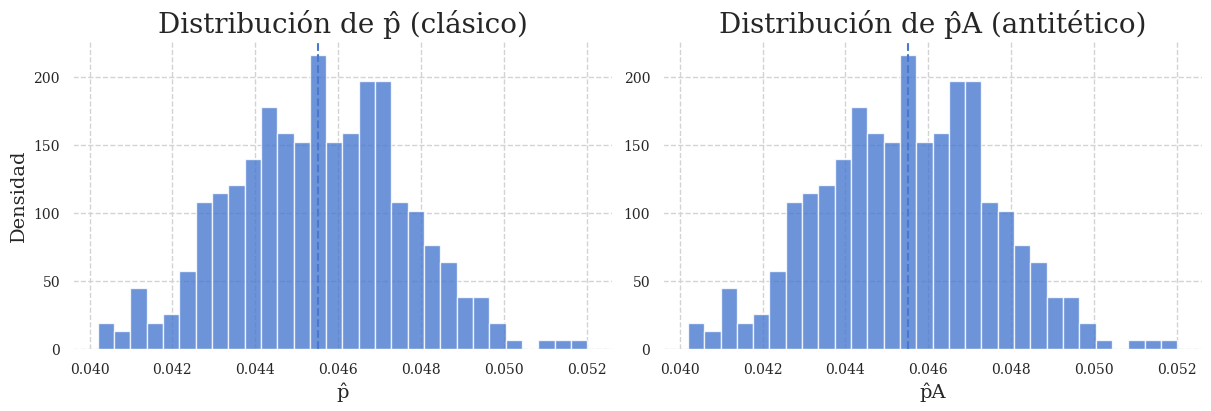

In [6]:

## === Gráficas ===
fig, ax = plt.subplots(1, 2, figsize=(12,4), constrained_layout=True)

ax[0].hist(means_classic, bins=30, density=True, alpha=0.8)
ax[0].axvline(p_true, linestyle="--")
ax[0].set_title("Distribución de p̂ (clásico)")
ax[0].set_xlabel("p̂"); ax[0].set_ylabel("Densidad")

ax[1].hist(means_anti, bins=30, density=True, alpha=0.8)
ax[1].axvline(p_true, linestyle="--")
ax[1].set_title("Distribución de p̂A (antitético)")
ax[1].set_xlabel("p̂A")

plt.show()

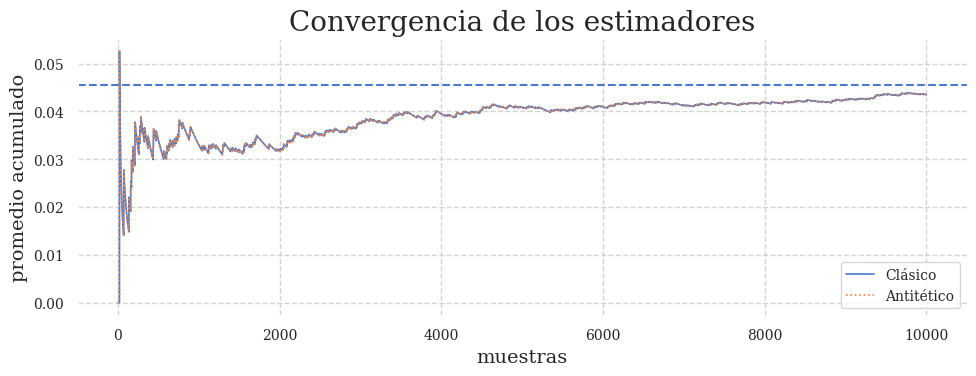

In [7]:

## === Curvas de convergencia (promedios parciales) ===
Z_path = np.random.randn(n)
h_path = (np.abs(Z_path) > 2.0).astype(float)
classic_path = np.cumsum(h_path)/np.arange(1, n+1)

## "Antitético" coincide con clásico aquí
anti_path = classic_path.copy()

plt.figure(figsize=(10,4))
plt.plot(classic_path, label="Clásico", linewidth=1.2)
plt.plot(anti_path, label="Antitético", linewidth=1.2, linestyle=":")
plt.axhline(p_true, linestyle="--")
plt.xlabel("muestras"); plt.ylabel("promedio acumulado")
plt.title("Convergencia de los estimadores")
plt.legend()
plt.tight_layout()
plt.show()


# Ejercicio 3



Objetivo: $\theta=\mathbb{E}[f(U)]$ con $U\sim\mathrm{Unif}(0,1)$. Se comparan varianzas de $\hat\theta_n$ y $\hat\theta_n^{(A)}$ a igualdad de (n).


Usando $\mathbb{E}[U^{k}]=\tfrac{1}{k+1}$:
$$
\theta=\mathbb{E}[U^{4}]-2\mathbb{E}[U^{2}]+1=\frac{1}{5}-\frac{2}{3}+1=\frac{8}{15}.
$$
Además,
$$
\mathbb{E}[f(U)^2]=\int_{0}^{1}(u^{4}-2u^{2}+1)^{2} du
=\int_{0}^{1} (u^{8}-4u^{6}+6u^{4}-4u^{2}+1)du
=\frac{128}{315},
$$
por lo que
$$
\operatorname{Var}(f(U))=\frac{128}{315}-(\frac{8}{15})^{2}=\frac{64}{525}.
$$
Para la covarianza, como $f(1-u)=(u^{2}-2u)^{2}=u^{4}-4u^{3}+4u^{2}$,
$$
\mathbb{E} \big[f(U)f(1-U)\big]
=\int_{0}^{1}(u^{4}-2u^{2}+1)(u^{4}-4u^{3}+4u^{2}) du
=\frac{103}{630},
$$
$$
\Rightarrow\quad \operatorname{Cov} (f(U),f(1-U))=\frac{103}{630}-(\frac{8}{15})^{2}=-\frac{127}{1050}<0.
$$
La varianza por muestra del promedio antitético:
$$
\frac{\operatorname{Var}(f(U))+\operatorname{Cov}(f(U),f(1-U))}{2}
=\frac{\frac{64}{525}-\frac{127}{1050}}{2}
=\frac{1}{2100}.
$$
Por tanto,
$$
\operatorname{Var}(\hat\theta_n)=\frac{64}{525}\frac{1}{n} \qquad
\operatorname{Var}(\hat\theta^{(A)}_n)=\frac{1}{2100}\frac{1}{n} \qquad
\mathrm{FRV}=\frac{1/2100}{64/525}=\frac{1}{256}.
$$

In [8]:
def f(u):
    return u**4 - 2*u**2 + 1

## Parámetros
n = 100           ## muestras por corrida
B = 400              ## corridas para ver distribución de estimadores

## Valores exactos
theta_true = 8/15
var_classic_theo = (64/525)/n
var_anti_theo = (1/2100)/n
frv_theo = var_anti_theo / var_classic_theo  ## = 1/256

## Una corrida: clásico vs antitético
U = np.random.rand(n)
theta_hat = f(U).mean()

pair_avg = 0.5*(f(U) + f(1-U))
theta_hat_a = pair_avg.mean()

## Estimación de varianzas del promedio (s^2/n)
var_hat = f(U).var(ddof=1) / n
var_hat_a = pair_avg.var(ddof=1) / n


print(f"θ verdadero = {theta_true:.10f}")
print("--- Una corrida ---")
print(f"Clásico:     θ̂ = {theta_hat:.6f}, Var≈{var_hat:.3e},  Var_teo≈{var_classic_theo:.3e}")
print(f"Antitético:  θ̂A= {theta_hat_a:.6f}, Var≈{var_hat_a:.3e}, Var_teo≈{var_anti_theo:.3e}")
print(f"FRV empírica≈ {var_hat_a/var_hat:.4f},  FRV teórica= {frv_theo:.4f}")



## Muchas corridas para ver la distribución de los estimadores
means_classic = np.empty(B)
means_anti = np.empty(B)

for b in range(B):
    Ub = np.random.rand(n)
    means_classic[b] = f(Ub).mean()
    means_anti[b] = 0.5*(f(Ub) + f(1- Ub)).mean()

def summary(x):
    return float(np.mean(x)), float(np.std(x, ddof=1))

mc_mean, mc_sd = summary(means_classic)
anti_mean, anti_sd = summary(means_anti)



print("\n--- Distribución de estimadores en múltiples corridas ---")
print(f"Clásico:     media={mc_mean:.6f}, sd≈{mc_sd:.3e}")
print(f"Antitético:  media={anti_mean:.6f}, sd≈{anti_sd:.3e}")
print(f"Ratio sd (ant/clas)≈ {anti_sd/mc_sd:.4f}  ~ √(1/256)= {np.sqrt(1/256):.4f}")


θ verdadero = 0.5333333333
--- Una corrida ---
Clásico:     θ̂ = 0.585569, Var≈1.220e-03,  Var_teo≈1.219e-03
Antitético:  θ̂A= 0.532049, Var≈4.685e-06, Var_teo≈4.762e-06
FRV empírica≈ 0.0038,  FRV teórica= 0.0039

--- Distribución de estimadores en múltiples corridas ---
Clásico:     media=0.536859, sd≈3.318e-02
Antitético:  media=0.533379, sd≈2.156e-03
Ratio sd (ant/clas)≈ 0.0650  ~ √(1/256)= 0.0625


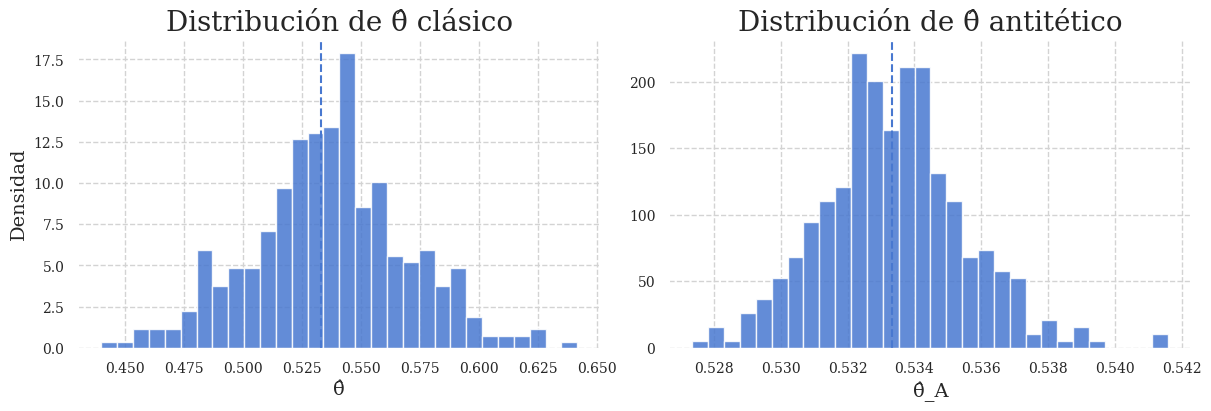

In [9]:

## Gráficas
fig, ax = plt.subplots(1, 2, figsize=(12,4), constrained_layout=True)
ax[0].hist(means_classic, bins=30, density=True, alpha=0.85)
ax[0].axvline(theta_true, linestyle="--")
ax[0].set_title("Distribución de θ̂ clásico")
ax[0].set_xlabel("θ̂"); ax[0].set_ylabel("Densidad")

ax[1].hist(means_anti, bins=30, density=True, alpha=0.85)
ax[1].axvline(theta_true, linestyle="--")
ax[1].set_title("Distribución de θ̂ antitético")
ax[1].set_xlabel("θ̂_A")
plt.show()

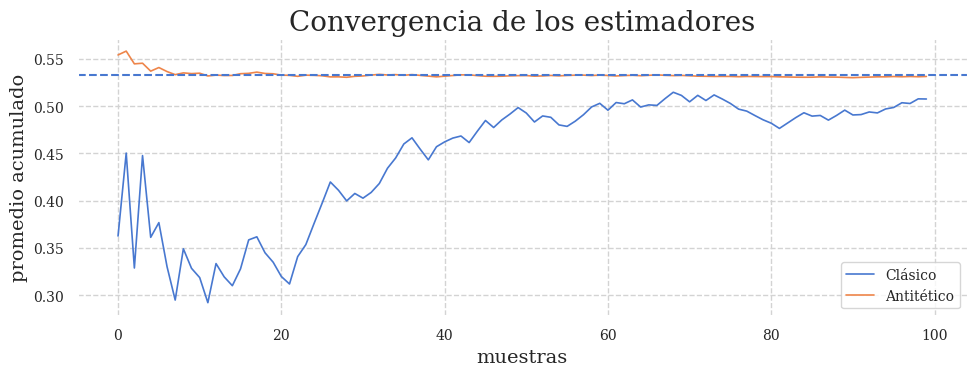

In [10]:

## Curvas de convergencia
U_path = np.random.rand(n)
cl_path = np.cumsum(f(U_path))/np.arange(1, n+1)
an_path = np.cumsum(0.5*(f(U_path) + f(1-U_path)))/np.arange(1, n+1)

plt.figure(figsize=(10,4))
plt.plot(cl_path, label="Clásico", linewidth=1.2)
plt.plot(an_path, label="Antitético", linewidth=1.2)
plt.axhline(theta_true, linestyle="--")
plt.xlabel("muestras"); plt.ylabel("promedio acumulado")
plt.title("Convergencia de los estimadores")
plt.legend()
plt.tight_layout()
plt.show()

# Ejercicio 4



Estimamos
$$
\theta=\mathbb{E}[N_2(10)-N_1(10)].
$$
Como $N_j(10)\sim\mathrm{Poi}(\lambda_j 10)$,
$$
\boxed{\ \theta=(\lambda_2-\lambda_1),10=(4-3)\cdot 10=10\ }.
$$

**(a) Independiente.** Generar $N_1(10)$ y $N_2(10)$ de forma independiente. Estimador
$$
\hat\theta_n^{\text{ind}}=\frac1n\sum_{k=1}^n (N_{2,k}(10)-N_{1,k}(10)).
$$
Varianza:
$$
\mathrm{Var}(\hat\theta_n^{\text{ind}})=\frac{1}{n}(\mathrm{Var}(N_2(10))+\mathrm{Var}(N_1(10)))=\frac{40+30}{n}=\frac{70}{n}.
$$
**(b) Variables comunes (CRN).** Usar la **misma** secuencia $U_i$ para construir interarribos de ambos procesos:
$$
E_i^{(j)}=\frac{-\ln U_i}{\lambda_j} \quad j=1,2.
$$
El estimador promedia diferencias con **acoplamiento positivo**:
$$
\hat\theta_n^{\text{crn}}=\frac1n\sum_{k=1}^n (\tilde N_{2,k}(10)-\tilde N_{1,k}(10)),
$$
donde $\tilde N_{j,k}(10)$ se generan con **los mismos** $U_i$ por corrida. La varianza resulta
$$
\mathrm{Var}(\hat\theta_n^{\text{crn}})=\frac{1}{n}(\mathrm{Var}(N_2(10))+\mathrm{Var}(N_1(10)) - 2 \mathrm{Cov}(\tilde N_2(10) \tilde N_1(10))),
$$
y, por teoría de **variables comunes**, $\mathrm{Cov}(\tilde N_2(10),\tilde N_1(10))\ge 0$, por lo que
$$
\boxed{\ \mathrm{Var}(\hat\theta_n^{\text{crn}})\le \mathrm{Var}(\hat\theta_n^{\text{ind}})=\tfrac{70}{n}\ }.
$$
Con la misma secuencia $U_i$, los tiempos $\tau_n^{(j)}=(1/\lambda_j)\sum_{i=1}^n(-\ln U_i)$ son **monótonos** en $\lambda_j$ más tasa $\Rightarrow$ más llegadas. Esto induce **correlación positiva** entre contadores y reduce la varianza de la **diferencia**. 

In [11]:
rng = np.random.default_rng(1234)

## Parámetros
lam1, lam2 = 3.0, 4.0
t_max = 10.0
n_runs = 20_000  ## corridas para estimar varianzas

true_theta = (lam2 - lam1) * t_max  ## 10

## --- (a) Corridas independientes: simular N_j(t) por método directo (Poisson) ---
N1_ind = rng.poisson(lam1 * t_max, size=n_runs)
N2_ind = rng.poisson(lam2 * t_max, size=n_runs)
theta_ind = (N2_ind - N1_ind).astype(float)

## --- (b) Variables comunes: misma secuencia U_i para interarribos de ambos procesos ---
def pois_count_with_common_U(lam1, lam2, t_max, rng):
    ## simula una corrida con CRN devolviendo (N1(t), N2(t))
    t1 = t2 = 0.0
    n1 = n2 = 0
    while True:
        u = rng.random()
        e1 = -np.log(u) / lam1
        e2 = -np.log(u) / lam2
        ## avanzar ambos en paralelo
        if t1 + e1 <= t_max:
            t1 += e1
            n1 += 1
        if t2 + e2 <= t_max:
            t2 += e2
            n2 += 1
        if (t1 + e1 > t_max) and (t2 + e2 > t_max):
            break
    return n1, n2

N1_crn = np.empty(n_runs, dtype=int)
N2_crn = np.empty(n_runs, dtype=int)
for k in range(n_runs):
    n1, n2 = pois_count_with_common_U(lam1, lam2, t_max, rng)
    N1_crn[k], N2_crn[k] = n1, n2

theta_crn = (N2_crn - N1_crn).astype(float)

## --- Estadísticos ---
def summarize(x):
    return float(np.mean(x)), float(np.var(x, ddof=1))

m_ind, v_ind = summarize(theta_ind)
m_crn, v_crn = summarize(theta_crn)



print(f"Valor verdadero E[N2-N1] = {true_theta:.6f}")
print("--- Independiente ---")
print(f"media={m_ind:.4f}, var≈{v_ind:.4f}  (teo por corrida: 70)")
print("--- Variables comunes ---")
print(f"media={m_crn:.4f}, var≈{v_crn:.4f}  (debe ser < 70 en práctica)")


Valor verdadero E[N2-N1] = 10.000000
--- Independiente ---
media=9.9329, var≈69.6014  (teo por corrida: 70)
--- Variables comunes ---
media=6.8982, var≈8.9580  (debe ser < 70 en práctica)


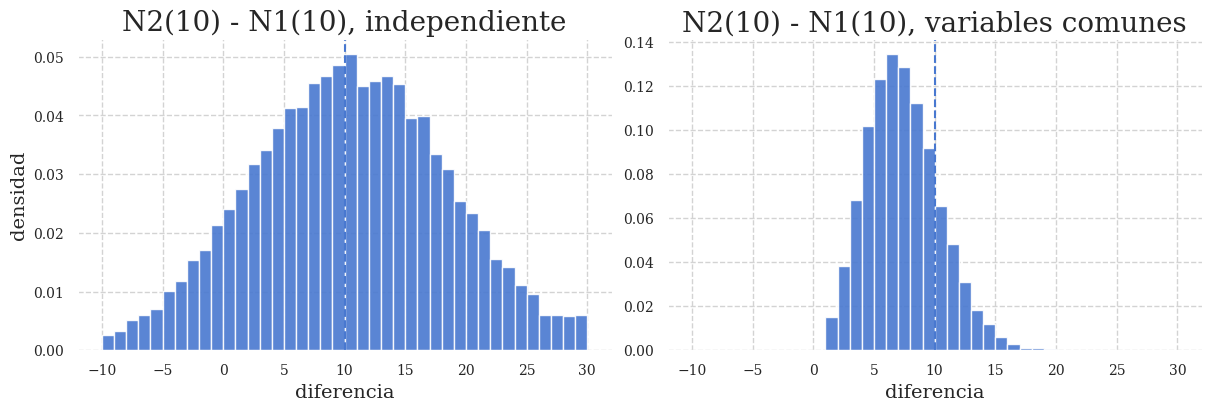

In [12]:

## --- Visualización: histogramas lado a lado ---
fig, ax = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
ax[0].hist(theta_ind, bins=range(-10, 31), density=True, alpha=0.9)
ax[0].axvline(true_theta, linestyle="--")
ax[0].set_title("N2(10) - N1(10), independiente")
ax[0].set_xlabel("diferencia")
ax[0].set_ylabel("densidad")

ax[1].hist(theta_crn, bins=range(-10, 31), density=True, alpha=0.9)
ax[1].axvline(true_theta, linestyle="--")
ax[1].set_title("N2(10) - N1(10), variables comunes")
ax[1].set_xlabel("diferencia")

plt.show()

In [13]:


## --- Estimación de varianza de los PROMEDIOS para distintos tamaños muestrales ---
## Compara Var( \hat theta_n ) empírica bajo independiente vs CRN
def batched_means(x, n, B=1000):
    ## genera B promedios de tamaño n a partir de x (con reemplazo)
    out = np.empty(B)
    for b in range(B):
        idx = rng.integers(0, len(x), size=n)
        out[b] = x[idx].mean()
    return out

for n in [50, 100, 500, 1000]:
    m_ind_b = batched_means(theta_ind, n)
    m_crn_b = batched_means(theta_crn, n)
    v_ind_b = np.var(m_ind_b, ddof=1)
    v_crn_b = np.var(m_crn_b, ddof=1)
    print(f"n={n:4d}  Var(θ̂_ind)≈{v_ind_b:.4f}   Var(θ̂_crn)≈{v_crn_b:.4f}   ratio≈{v_crn_b/v_ind_b:.3f}")


n=  50  Var(θ̂_ind)≈1.4014   Var(θ̂_crn)≈0.1554   ratio≈0.111
n= 100  Var(θ̂_ind)≈0.6984   Var(θ̂_crn)≈0.0915   ratio≈0.131
n= 500  Var(θ̂_ind)≈0.1304   Var(θ̂_crn)≈0.0189   ratio≈0.145
n=1000  Var(θ̂_ind)≈0.0682   Var(θ̂_crn)≈0.0086   ratio≈0.126


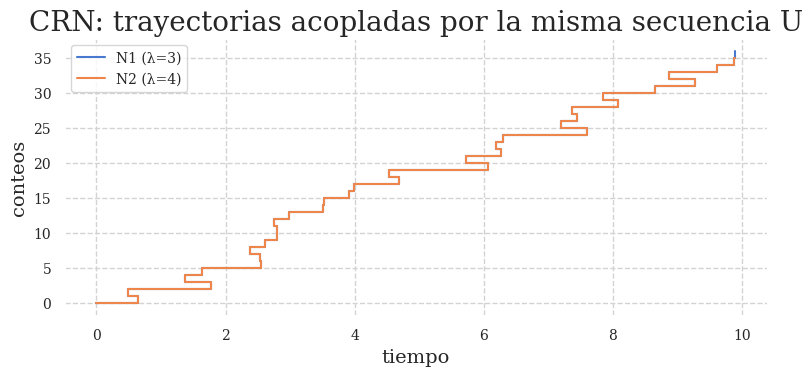

In [14]:

## --- Trayectorias ejemplo para ilustrar acoplamiento ---
## Construye dos procesos con mismos U y grafica conteos vs tiempo
def path_with_common_U(lam1, lam2, t_max, rng):
    t=0.0
    t_points=[0.0]
    n1=[0]; n2=[0]
    while True:
        u = rng.random()
        e1 = -np.log(u)/lam1
        e2 = -np.log(u)/lam2
        t_next = min(t+e1, t+e2)
        if t+e1 <= t_max:
            t = t+e1
            t_points.append(t); n1.append(n1[-1]+1); n2.append(n2[-1])  ## llegada en 1
        if t+e2 <= t_max:
            ## cuidado con dobles llegadas si t+e1==t+e2: se registran ambas
            if t+e2 < t:
                t = t+e2
                t_points.append(t); n2.append(n2[-1]+1); n1.append(n1[-1])
            else:
                ## misma marca de tiempo o posterior a la de arriba
                t_points[-1]=max(t_points[-1], t+e2)
                n2[-1]=n2[-1]+1
        if (t+e1 > t_max) and (t+e2 > t_max):
            break
    return np.array(t_points), np.array(n1), np.array(n2)

t_pts, n1_path, n2_path = path_with_common_U(lam1, lam2, t_max, rng)

plt.figure(figsize=(8,4))
plt.step(t_pts, n1_path, where="post", label="N1 (λ=3)")
plt.step(t_pts, n2_path, where="post", label="N2 (λ=4)")
plt.xlabel("tiempo"); plt.ylabel("conteos")
plt.title("CRN: trayectorias acopladas por la misma secuencia U")
plt.legend()
plt.tight_layout()
plt.show()


# Ejercicio 5

Con $T>0$ y $W_T\sim N(0,T)$,
$$
S_j(T)=S_0\exp\ ((\mu_j-\tfrac12\sigma_j^2)T+\sigma_j W_T) \quad j=1,2. \quad \text{(definición de MBG)}
$$


* **Independiente:** $S_1,S_2$ se simulan con $Z_1,Z_2$ independientes.
* **CRN:** $S_1,S_2$ usan el **mismo** (Z). Meta: aumentar $\mathrm{Cov}(S_1,S_2)$ y reducir $\mathrm{Var}(S_2-S_1)$. 



Hechos del MBG:
$$
E[S_j(T)]=S_0e^{\mu_j T} \qquad
\mathrm{Var}(S_j(T))=S_0^2 e^{2\mu_j T}(e^{\sigma_j^2T}-1).
$$
Para CRN, con el **mismo** $W_T$,
$$
E[S_1S_2]=S_0^2 e^{(\mu_1+\mu_2+\sigma_1\sigma_2)T}
\Rightarrow \mathrm{Cov}(S_1,S_2)=S_0^2 e^{(\mu_1+\mu_2)T} (e^{\sigma_1\sigma_2T}-1)!> 0.
$$
Entonces
$$
\begin{aligned}
\theta&=E[S_2-S_1]=S_0 (e^{\mu_2T}-e^{\mu_1T}),\\
\mathrm{Var}*{\text{ind}}(S_2-S_1)&=\mathrm{Var}(S_2)+\mathrm{Var}(S_1),\\
\mathrm{Var}*{\text{CRN}}(S_2-S_1)&=\mathrm{Var}(S_2)+\mathrm{Var}(S_1)-2 \mathrm{Cov}(S_2,S_1).
\end{aligned}
$$
(Identidad de varianza con covarianza para CRN.) 

**Valores numéricos con $T=1$, $S_0=100$:**
$$
\begin{aligned}
E[S_1]&=100e^{0.05}\approx 105.1271 \quad E[S_2]=100e^{0.07}\approx 107.2508,\\
\theta&\approx 2.123708,\\
\mathrm{Var}(S_1)&=100^2 e^{0.10}(e^{0.04}-1)\approx 451.0288,\\
\mathrm{Var}(S_2)&=100^2 e^{0.14}(e^{0.0625}-1)\approx 741.8629,\\
\mathrm{Cov}(S_1,S_2)&=100^2 e^{0.12}(e^{0.05}-1)\approx 578.0800,\\
\mathrm{Var}*{\text{ind}}&\approx 1192.891 \qquad
\mathrm{Var}*{\text{CRN}}\approx 36.732,\\
\mathrm{FRV}&:=\frac{\mathrm{Var}*{\text{CRN}}}{\mathrm{Var}*{\text{ind}}}\approx 0.0308.
\end{aligned}
$$

In [15]:

## Parámetros
S0, T = 100.0, 1.0
mu1, mu2 = 0.05, 0.07
sig1, sig2 = 0.20, 0.25
n = 200_000  ## corridas

## Verdaderos
theta_true = S0*(np.exp(mu2*T) - np.exp(mu1*T))

## --- (a) Independiente ---
Z1 = np.random.randn(n)
Z2 = np.random.randn(n)
S1_ind = S0*np.exp((mu1-0.5*sig1**2)*T + sig1*np.sqrt(T)*Z1)
S2_ind = S0*np.exp((mu2-0.5*sig2**2)*T + sig2*np.sqrt(T)*Z2)
D_ind = S2_ind - S1_ind
theta_ind = D_ind.mean()
var_ind = D_ind.var(ddof=1)
se_ind = np.sqrt(var_ind/n)

## --- (b) Variables comunes (CRN) ---
Z = np.random.randn(n)
S1_crn = S0*np.exp((mu1-0.5*sig1**2)*T + sig1*np.sqrt(T)*Z)
S2_crn = S0*np.exp((mu2-0.5*sig2**2)*T + sig2*np.sqrt(T)*Z)
D_crn = S2_crn - S1_crn
theta_crn = D_crn.mean()
var_crn = D_crn.var(ddof=1)
se_crn = np.sqrt(var_crn/n)


print(f"θ verdadero = {theta_true:.6f}")
print("--- Independiente ---")
print(f"θ̂ = {theta_ind:.6f}  Var≈{var_ind:.3f}  SE≈{se_ind:.6f}")
print("--- Variables comunes ---")
print(f"θ̂ = {theta_crn:.6f}  Var≈{var_crn:.3f}  SE≈{se_crn:.6f}")
print(f"FRV ≈ Var_CRN / Var_IND = {var_crn/var_ind:.4f}")


θ verdadero = 2.123708
--- Independiente ---
θ̂ = 2.247785  Var≈1190.086  SE≈0.077139
--- Variables comunes ---
θ̂ = 2.114648  Var≈36.783  SE≈0.013562
FRV ≈ Var_CRN / Var_IND = 0.0309


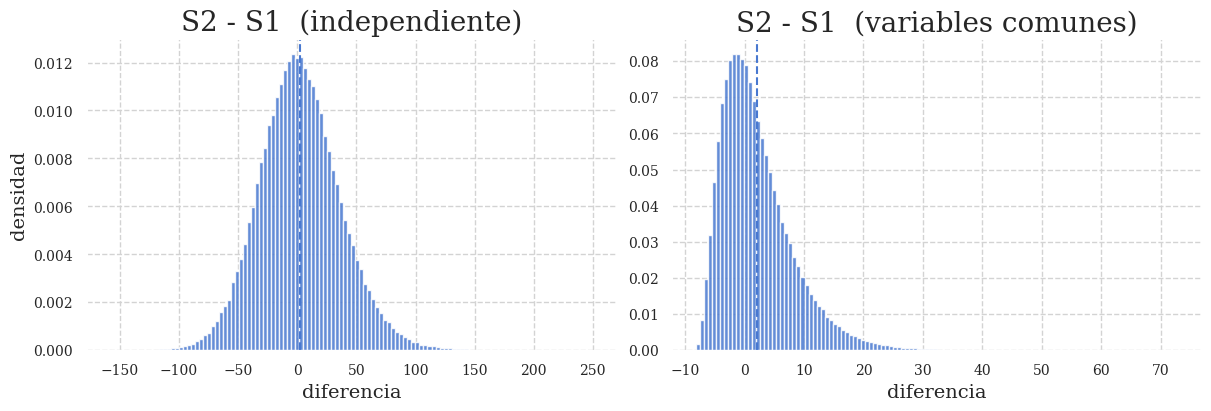

In [16]:

## Histogramas lado a lado
fig, ax = plt.subplots(1,2, figsize=(12,4), constrained_layout=True)
ax[0].hist(D_ind, bins=120, density=True, alpha=0.85)
ax[0].axvline(theta_true, linestyle="--")
ax[0].set_title("S2 - S1  (independiente)")
ax[0].set_xlabel("diferencia"); ax[0].set_ylabel("densidad")

ax[1].hist(D_crn, bins=120, density=True, alpha=0.85)
ax[1].axvline(theta_true, linestyle="--")
ax[1].set_title("S2 - S1  (variables comunes)")
ax[1].set_xlabel("diferencia")

plt.show()

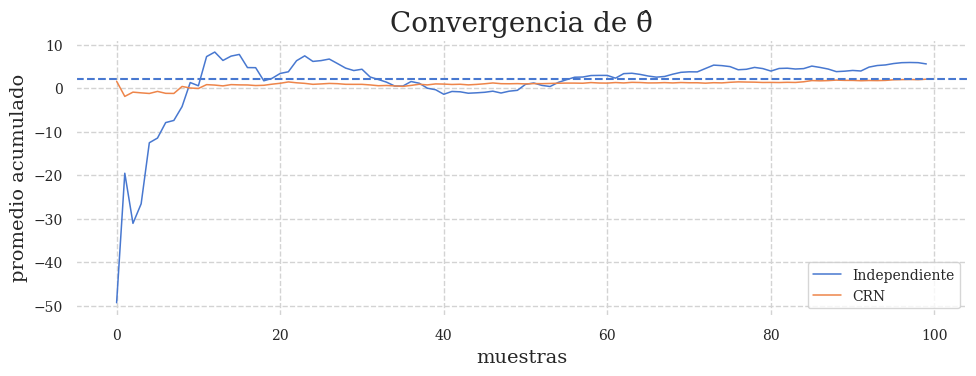

In [17]:


## Convergencia de promedios
m = 100
Z_path = np.random.randn(m)
D_ind_path = (
    S0*np.exp((mu2-0.5*sig2**2)*T + sig2*np.sqrt(T)*np.random.randn(m))
  - S0*np.exp((mu1-0.5*sig1**2)*T + sig1*np.sqrt(T)*np.random.randn(m))
)
D_crn_path = (
    S0*np.exp((mu2-0.5*sig2**2)*T + sig2*np.sqrt(T)*Z_path)
  - S0*np.exp((mu1-0.5*sig1**2)*T + sig1*np.sqrt(T)*Z_path)
)

cum_ind = np.cumsum(D_ind_path)/np.arange(1, m+1)
cum_crn = np.cumsum(D_crn_path)/np.arange(1, m+1)

plt.figure(figsize=(10,4))
plt.plot(cum_ind, label="Independiente", linewidth=1.1)
plt.plot(cum_crn, label="CRN", linewidth=1.1)
plt.axhline(theta_true, linestyle="--")
plt.xlabel("muestras"); plt.ylabel("promedio acumulado")
plt.title("Convergencia de θ̂")
plt.legend()
plt.tight_layout()
plt.show()


In [18]:

## Validación con fórmulas cerradas (opcional)
var1 = S0**2*np.exp(2*mu1*T)*(np.exp(sig1**2*T)-1)
var2 = S0**2*np.exp(2*mu2*T)*(np.exp(sig2**2*T)-1)
cov12 = S0**2*np.exp((mu1+mu2)*T)*(np.exp(sig1*sig2*T)-1)
print(f"Var_ind_teo ≈ {var1+var2:.3f}   Var_CRN_teo ≈ {var1+var2-2*cov12:.3f}")


Var_ind_teo ≈ 1192.892   Var_CRN_teo ≈ 36.732


# Ejercicio 6


Con independencia estándar entre (N) y ${Y_{j,i}}$,
$$
\theta(t)=\mathbb{E}[S_B(t)-S_A(t)]=\mathbb{E}[N(t)](\mathbb{E}[Y_B]-\mathbb{E}[Y_A])
=\lambda t(\tfrac1{0.8}-1)=\tfrac{\lambda t}{4}=0.5 t.
$$
El enunciado pide comparar varianzas del estimador por (i) método clásico y (ii) CRN. 


**Clásico:** simular $S_A$ y $S_B$ **independientes** por corrida estimar $\theta$ con promedios de $D=S_B-S_A$.
**CRN:** misma trayectoria de (N(t)) y mismos $V_i$ para ambas severidades estimador con $D^{\text{CRN}}=S_B-S_A$ usando pares acoplados. La varianza del promedio de diferencias cumple
$$
\mathrm{Var}(\hat\theta_n)=\frac1n \mathrm{Var}(D) \quad
\mathrm{Var}(D)=\mathrm{Var}(S_B)+\mathrm{Var}(S_A)-2\mathrm{Cov}(S_B S_A).
$$
CRN maximiza la covarianza y por tanto **minimiza** la varianza. 



Hechos del compuesto Poisson: si $N\sim\mathrm{Poi}(m)$ con $m=\lambda t$ y (Y) i.i.d. independientes de (N),
$$
\mathbb{E}[S]=m \mathbb{E}[Y] \qquad \mathrm{Var}(S)=m \mathbb{E}[Y^2].
$$
Para tasas $\beta$, $\mathrm{Exp}(\beta)$: $\mathbb{E}[Y]=1/\beta$, $\mathbb{E}[Y^2]=2/\beta^2$.

**Clásico (indep.)**
$$
\mathrm{Var}_{\text{ind}}(D)=\mathrm{Var}(S_B)+\mathrm{Var}(S_A)
=m(\tfrac{2}{0.8^2}+2)=m (3.125+2)=m\cdot 5.125.
$$
**CRN $compartiendo (N) y (V_i)$**
Con $V\sim U(0,1)$,
$$
Y_A=-\ln(1-V) \qquad Y_B=-\tfrac{1}{0.8}\ln(1-V)=\tfrac{1}{0.8}Y_A,
$$
por lo que $Y_B$ es **proporcional** a $Y_A$ y
$$
\mathbb{E}[Y_A Y_B]=\tfrac{1}{0.8}\mathbb{E}[Y_A^2]=1.25\times 2=2.5.
$$
Para sumas acopladas sobre el mismo (N),
$$
\mathrm{Cov}(S_B S_A)=m \mathbb{E}[Y_B Y_A]=m\cdot 2.5.
$$
Así,
$$
\mathrm{Var}_{\text{CRN}}(D)=m(3.125+2)-2m(2.5)=m(5.125-5)=m\cdot 0.125.
$$
**Resumen en función de (t) y $\lambda=2$**
$$
\boxed{
\begin{aligned}
\theta(t)&=0.5 t,\\
\mathrm{Var}*{\text{ind}}(D)&=5.125 (\lambda t)=10.25 t,\\
\mathrm{Var}*{\text{CRN}}(D)&=0.125 (\lambda t)=0.25 t,\\
\mathrm{FRV}&:=\frac{\mathrm{Var}*{\text{CRN}}}{\mathrm{Var}*{\text{ind}}}=\frac{0.25}{10.25}\approx 0.02439.
\end{aligned}}
$$

In [19]:
## Parámetros
lam = 2.0
t = 10.0               ## puedes cambiar el horizonte; fórmulas arriba valen para todo t
m = lam * t
n = 100_000            ## corridas
beta_A = 1.0           ## tasa Exp para caso A
beta_B = 0.8           ## tasa Exp para caso B

theta_true = 0.5 * t   ## = (lam*t)*(1/0.8 - 1)

## ---------- Método clásico: simulaciones independientes ----------
## Para eficiencia, usamos que S = sum_{i=1}^N Y_i con N~Poi(m), Y~Exp(beta)
## Generamos N_A, N_B y luego severidades independientes
N_A = rng.poisson(m, size=n)
N_B = rng.poisson(m, size=n)

def compound_sum_poisson(N, beta, rng):
    ## Construye las sumas por vectorización sobre todas las corridas,
    ## generando una sola muestra de tamaño total y acumulando por índices.
    total_claims = int(N.sum())
    if total_claims == 0:
        return np.zeros_like(N, dtype=float)
    V = rng.random(total_claims)
    ## Inversa exponencial: Y = -ln(1-V)/beta
    Y = -np.log1p(-V) / beta
    out = np.zeros_like(N, dtype=float)
    idx = np.repeat(np.arange(len(N)), N)
    np.add.at(out, idx, Y)
    return out

S_A_ind = compound_sum_poisson(N_A, beta_A, rng)
S_B_ind = compound_sum_poisson(N_B, beta_B, rng)
D_ind = S_B_ind - S_A_ind

theta_ind = D_ind.mean()
var_ind = D_ind.var(ddof=1)
se_ind = np.sqrt(var_ind / n)

## ---------- Variables comunes: mismo N y mismos V_i ----------
N = rng.poisson(m, size=n)

## Genera uniformes para todas las reclamaciones y reparte por corrida
total = int(N.sum())
V = rng.random(total)

Y_A_all = -np.log1p(-V) / beta_A
Y_B_all = -np.log1p(-V) / beta_B  ## proporcional a Y_A_all

S_A_crn = np.zeros_like(N, dtype=float)
S_B_crn = np.zeros_like(N, dtype=float)
idx = np.repeat(np.arange(n), N)
np.add.at(S_A_crn, idx, Y_A_all)
np.add.at(S_B_crn, idx, Y_B_all)
D_crn = S_B_crn - S_A_crn

theta_crn = D_crn.mean()
var_crn = D_crn.var(ddof=1)
se_crn = np.sqrt(var_crn / n)

print(f"θ(t) verdadero = {theta_true:.6f}")
print("--- Clásico ---")
print(f"θ̂ = {theta_ind:.6f}   Var≈{var_ind:.4f}   SE≈{se_ind:.6f}")
print("--- CRN ---")
print(f"θ̂ = {theta_crn:.6f}   Var≈{var_crn:.4f}   SE≈{se_crn:.6f}")
print(f"FRV ≈ Var_CRN / Var_IND = {var_crn/var_ind:.4f}")


θ(t) verdadero = 5.000000
--- Clásico ---
θ̂ = 4.913763   Var≈102.4610   SE≈0.032010
--- CRN ---
θ̂ = 4.998786   Var≈2.5012   SE≈0.005001
FRV ≈ Var_CRN / Var_IND = 0.0244


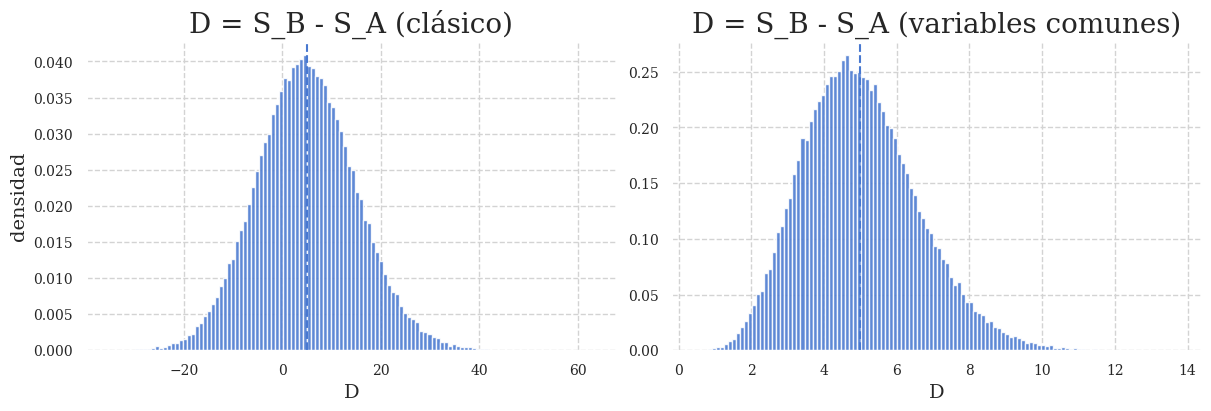

In [20]:

## ---------- Gráficas ----------
fig, ax = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
ax[0].hist(D_ind, bins=120, density=True, alpha=0.88)
ax[0].axvline(theta_true, linestyle="--")
ax[0].set_title("D = S_B - S_A (clásico)")
ax[0].set_xlabel("D"); ax[0].set_ylabel("densidad")

ax[1].hist(D_crn, bins=120, density=True, alpha=0.88)
ax[1].axvline(theta_true, linestyle="--")
ax[1].set_title("D = S_B - S_A (variables comunes)")
ax[1].set_xlabel("D")
plt.show()



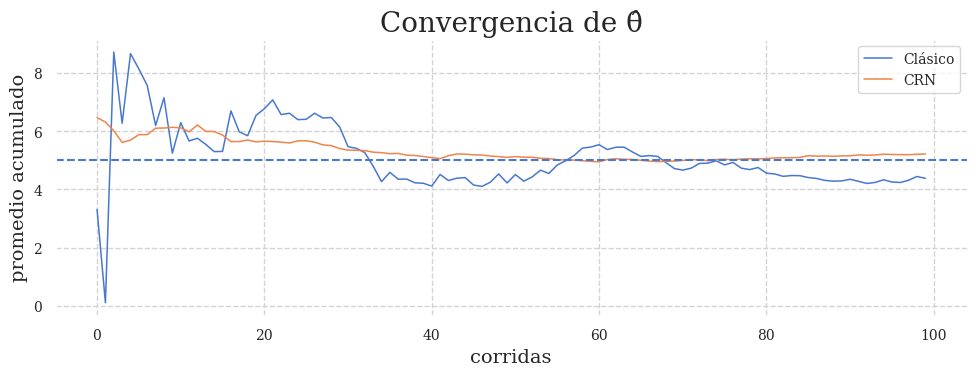

In [21]:
## Curvas de convergencia de promedios
m_c = 100
rng2 = np.random.default_rng(7)
## clásico
N_A_p = rng2.poisson(m, size=m_c)
N_B_p = rng2.poisson(m, size=m_c)
S_A_p = compound_sum_poisson(N_A_p, beta_A, rng2)
S_B_p = compound_sum_poisson(N_B_p, beta_B, rng2)
cum_ind = np.cumsum(S_B_p - S_A_p)/np.arange(1, m_c+1)

## CRN
N_p = rng2.poisson(m, size=m_c)
tot_p = int(N_p.sum())
V_p = rng2.random(tot_p)
Y_A_p = -np.log1p(-V_p)/beta_A
Y_B_p = -np.log1p(-V_p)/beta_B
S_Ap = np.zeros_like(N_p, dtype=float)
S_Bp = np.zeros_like(N_p, dtype=float)
idxp = np.repeat(np.arange(m_c), N_p)
np.add.at(S_Ap, idxp, Y_A_p)
np.add.at(S_Bp, idxp, Y_B_p)
cum_crn = np.cumsum(S_Bp - S_Ap)/np.arange(1, m_c+1)

plt.figure(figsize=(10,4))
plt.plot(cum_ind, label="Clásico", linewidth=1.1)
plt.plot(cum_crn, label="CRN", linewidth=1.1)
plt.axhline(theta_true, linestyle="--")
plt.xlabel("corridas"); plt.ylabel("promedio acumulado")
plt.title("Convergencia de θ̂")
plt.legend()
plt.tight_layout()
plt.show()
